In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### DATA

In [2]:
df = pd.read_csv('data.csv') 
df.head(10).style.background_gradient(cmap = "Reds_r")

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,"1,10",Ideal,H,SI1,VG,EX,GIA,$ 5 169
1,2,"0,83",Ideal,H,VS1,ID,ID,AGSL,$ 3 470
2,3,"0,85",Ideal,H,SI1,EX,EX,GIA,$ 3 183
3,4,"0,91",Ideal,E,SI1,VG,VG,GIA,$ 4 370
4,5,"0,83",Ideal,G,SI1,EX,EX,GIA,$ 3 171
5,6,"1,53",Ideal,E,SI1,ID,ID,AGSL,$ 12 791
6,7,"1,00",Very Good,D,SI1,VG,G,GIA,$ 5 747
7,8,"1,50",Fair,F,SI1,VG,VG,GIA,$ 10 450
8,9,"2,11",Ideal,H,SI1,VG,VG,GIA,$ 18 609
9,10,"1,05",Very Good,E,VS1,VG,G,GIA,$ 7 666


## CLEANING AND FEATURE ENGINEERING

In [3]:
df = df.drop_duplicates()

In [4]:
df.dtypes

ID               int64
Carat Weight    object
Cut             object
Color           object
Clarity         object
Polish          object
Symmetry        object
Report          object
Price           object
dtype: object

In [5]:
df.isnull().sum()

ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [6]:
#Carat Weight	
df['Carat Weight'] = df['Carat Weight'].str.replace(',', '.').astype('float')

In [7]:
#Price
df['Price_cleaned'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)
df['Price_dollar'] = df['Price_cleaned'].astype('float')

In [8]:
df.drop(columns=['Price_cleaned', 'Price'], inplace=True)

In [9]:
#other object columns
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [10]:
print(df['Cut'].unique())
print(df['Color'].unique())
print(df['Clarity'].unique())
print(df['Polish'].unique())
print(df['Symmetry'].unique())
print(df['Report'].unique())

['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
['H' 'E' 'G' 'D' 'F' 'I']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
['VG' 'ID' 'EX' 'G']
['EX' 'ID' 'VG' 'G']
['GIA' 'AGSL']


In [11]:
Cut_grades = {'Ideal': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1, 'Signature-Ideal': 5}
Color_grades = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1}
Clarity_grades = {'FL': 7, 'IF': 6, 'VVS1': 5, 'VVS2': 4, 'VS1': 3, 'VS2': 2, 'SI1': 1}
Polish_and_Symmetry_grades = {'EX': 4, 'ID': 4, 'VG': 3, 'G': 2}
Report_grades = {'GIA':1, 'AGSL': 1}

df['Cut'] = df['Cut'].map(Cut_grades)
df['Color'] = df['Color'].map(Color_grades)
df['Clarity'] = df['Clarity'].map(Clarity_grades)
df['Polish'] = df['Polish'].map(Polish_and_Symmetry_grades)
df['Symmetry'] = df['Symmetry'].map(Polish_and_Symmetry_grades)
df['Report'] = df['Report'].map(Report_grades) 

In [12]:
df.dtypes #check

ID                int64
Carat Weight    float64
Cut               int64
Color             int64
Clarity           int64
Polish            int64
Symmetry          int64
Report            int64
Price_dollar    float64
dtype: object

In [13]:
df.describe()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price_dollar
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0,6000.000000
mean,3000.500000,1.334520,3.33700,3.256167,2.369333,3.408167,3.291833,1.0,11791.579333
std,1732.195139,0.475696,0.82029,1.561714,1.370367,0.657246,0.715601,0.0,10184.350051
min,1.000000,0.750000,1.00000,1.000000,1.000000,2.000000,2.000000,1.0,2184.000000
25%,1500.750000,1.000000,3.00000,2.000000,1.000000,3.000000,3.000000,1.0,5150.500000
50%,3000.500000,1.130000,3.00000,3.000000,2.000000,4.000000,3.000000,1.0,7857.000000
75%,4500.250000,1.590000,4.00000,4.000000,3.000000,4.000000,4.000000,1.0,15036.500000
max,6000.000000,2.910000,5.00000,6.000000,7.000000,4.000000,4.000000,1.0,101561.000000


## Outlier handling 

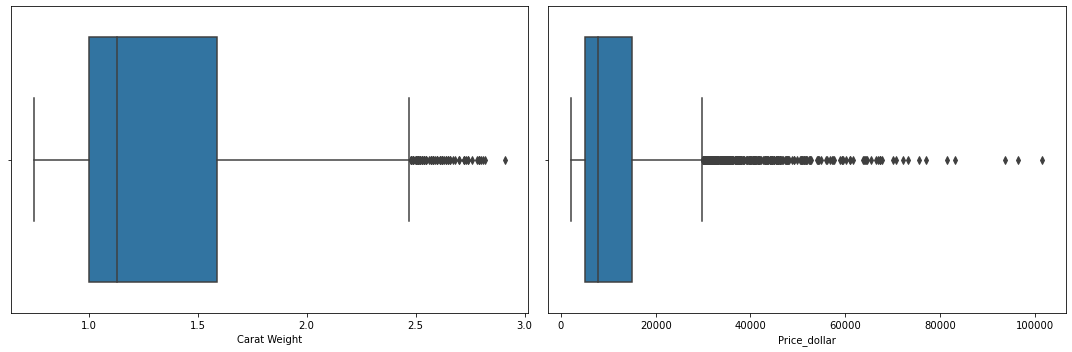

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
#boxplot для Carat Weight
sns.boxplot(x=df['Carat Weight'], ax=ax[0])  
ax[0].set_xlabel('Carat Weight') 
# Второй boxplot для Price_dollar
sns.boxplot(x=df['Price_dollar'], ax=ax[1])  
ax[1].set_xlabel('Price_dollar') 
plt.tight_layout()  
plt.show()  

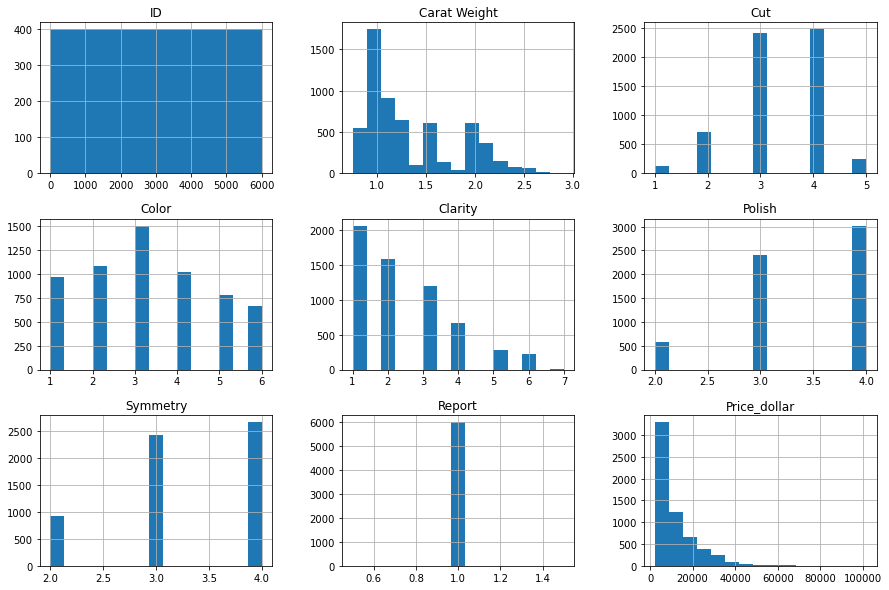

In [15]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

In [16]:
# находим и удаляем выбросы через IQR
Q1 = df['Price_dollar'].quantile(0.25)
Q3 = df['Price_dollar'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Создаем новый DataFrame без выбросов
df_no_outliers = df[(df['Price_dollar'] >= lower_bound) & (df['Price_dollar'] <= upper_bound)]


In [17]:
df_no_outliers.describe()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price_dollar
count,5621.000000,5621.00000,5621.000000,5621.000000,5621.000000,5621.000000,5621.000000,5621.0,5621.000000
mean,2997.746308,1.27538,3.320406,3.178082,2.280199,3.400640,3.281267,1.0,9879.552571
std,1730.146081,0.42737,0.829821,1.550958,1.322115,0.660227,0.716645,0.0,6633.032451
min,1.000000,0.75000,1.000000,1.000000,1.000000,2.000000,2.000000,1.0,2184.000000
25%,1500.000000,1.00000,3.000000,2.000000,1.000000,3.000000,3.000000,1.0,5019.000000
50%,3002.000000,1.10000,3.000000,3.000000,2.000000,3.000000,3.000000,1.0,7361.000000
75%,4486.000000,1.51000,4.000000,4.000000,3.000000,4.000000,4.000000,1.0,12400.000000
max,5999.000000,2.91000,5.000000,6.000000,6.000000,4.000000,4.000000,1.0,29860.000000


## Feature importances

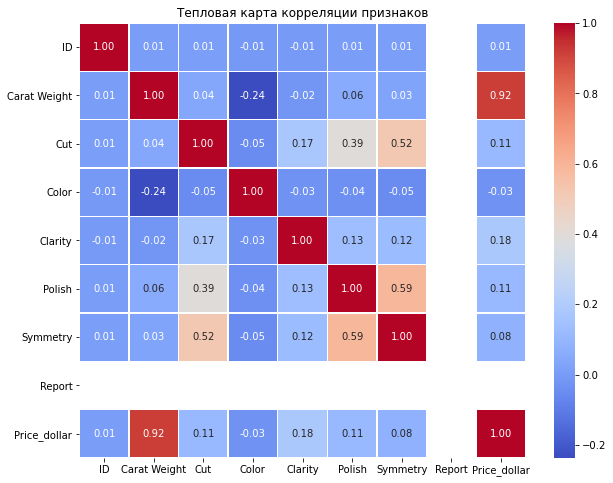

In [18]:
corr_matrix = df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Тепловая карта корреляции признаков')
plt.show()

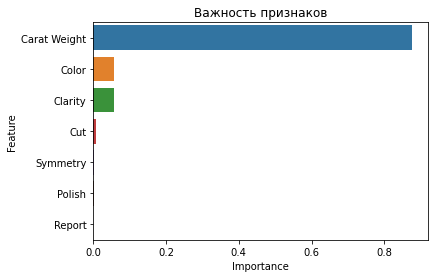

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df_no_outliers.drop(['ID', 'Price_dollar'], axis=1)
y = df_no_outliers['Price_dollar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
importances = model1.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Важность признаков')
plt.show()

In [20]:
# Оценка модели
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
predictions1 = model1.predict(X_test)

mse = mean_squared_error(y_test, predictions1)
r_squared = r2_score(y_test, predictions1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions1)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R^2): {r_squared:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")


Root Mean Squared Error (RMSE): 858.55
Mean Absolute Error (MAE): 531.76
Коэффициент детерминации (R^2): 0.98
Среднеквадратичная ошибка (MSE): 737099.6157692752


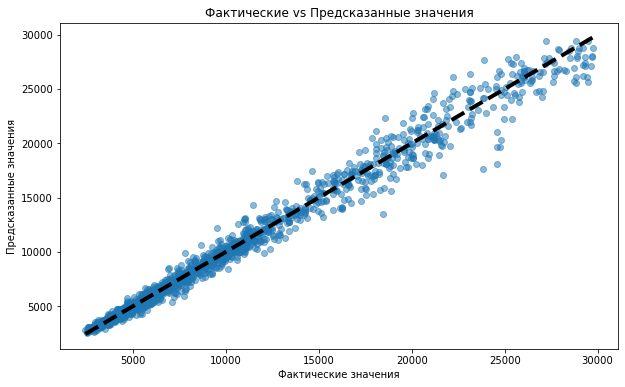

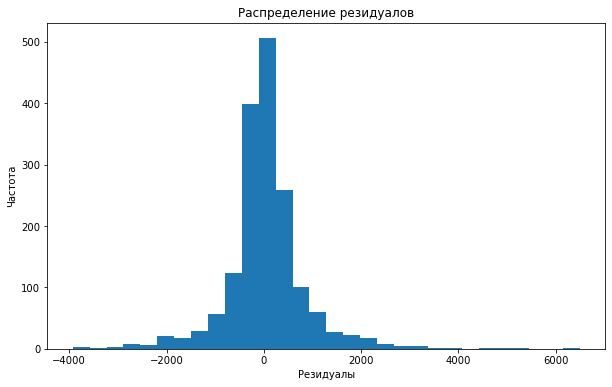

In [21]:
residuals1 = y_test - predictions1

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# Гистограмма резидуалов
plt.figure(figsize=(10, 6))
plt.hist(residuals1, bins=30)
plt.xlabel('Резидуалы')
plt.ylabel('Частота')
plt.title('Распределение резидуалов')
plt.show()


In [22]:
df = df_no_outliers.drop(['Report', 'Symmetry', 'Polish'], axis = 1)

In [23]:
ds = df.copy()
ds = ds.drop('ID', axis=1)
ds

,Carat Weight,Cut,Color,Clarity,Price_dollar
0,1.10,4,2,1,5169.0
1,0.83,4,2,3,3470.0
2,0.85,4,2,1,3183.0
3,0.91,4,5,1,4370.0
4,0.83,4,3,1,3171.0
...,...,...,...,...,...
5994,0.81,3,6,4,5423.0
5995,1.03,4,6,1,6250.0
5996,1.00,3,6,1,5328.0
5997,1.02,4,6,1,6157.0


## Standardization and dimensionality reduction

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [25]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5621.0,-2.907398e-17,1.410926,-2.238208,-1.094971,-0.392909,0.707816,4.341663
col2,5621.0,4.143832e-17,1.073908,-3.051311,-0.758911,-0.039518,0.717213,3.308674
col3,5621.0,-7.113940e-17,0.995127,-1.926508,-0.841040,-0.051355,0.753803,2.831964


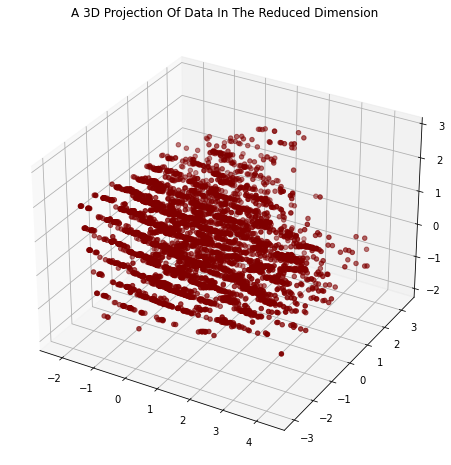

In [26]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## CLUSTERING
### Elbow Method to determine the number of clusters to be formed
### Clustering via Agglomerative Clustering

Elbow Method to determine the number of clusters to be formed:


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

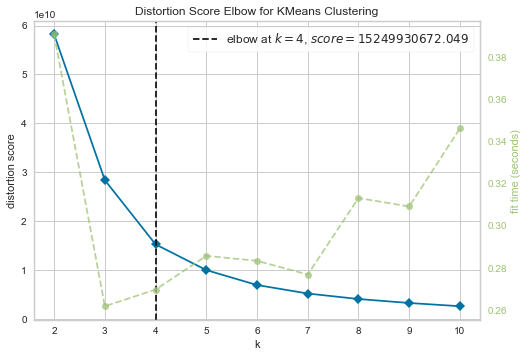

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(ds)
Elbow_M.show()

In [28]:
#Initiating the Agglomerative Clustering model 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(ds)
ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

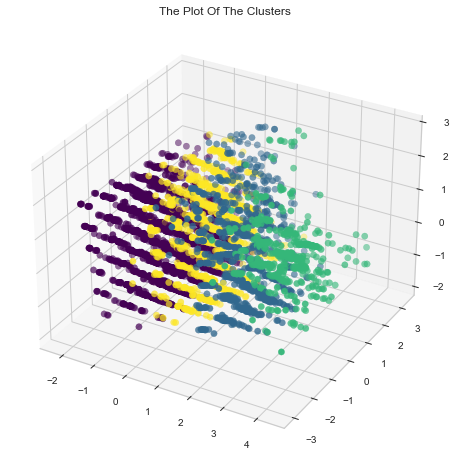

In [29]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=ds["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

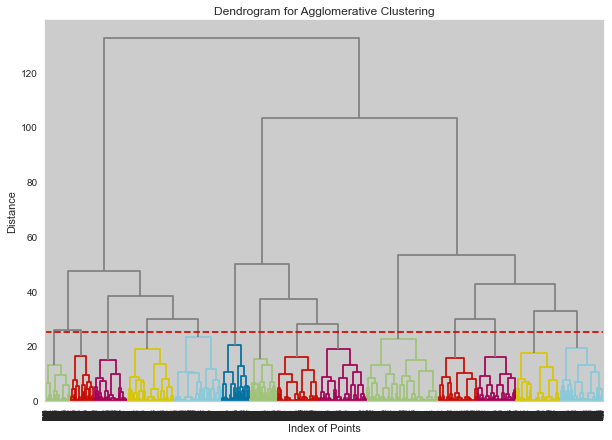

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = ds[['Cut', 'Color', 'Clarity', 'Carat Weight']].values  

# Создание матрицы связей с использованием метода 'ward'
Z = linkage(X, method='ward')

# Определите значение 'max_d', которое определяет порог обрезки для цвета
max_d = 25 

# Построение дендограммы с использованием порога цвета
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Agglomerative Clustering')
dendrogram(
    Z,
    color_threshold=max_d,  # Установка порога цвета
    above_threshold_color='gray'  # Все связи выше порога будут серыми
)
plt.axhline(y=max_d, color='r', linestyle='--')  # Добавление линии обрезки для наглядности
plt.xlabel('Index of Points')
plt.ylabel('Distance')
plt.show()


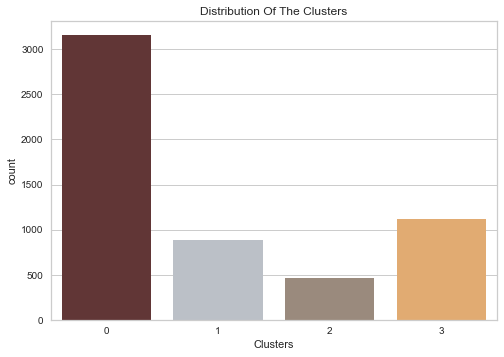

In [31]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [32]:
df['Clusters'].value_counts()

0    3157
3    1120
1     886
2     458
Name: Clusters, dtype: int64

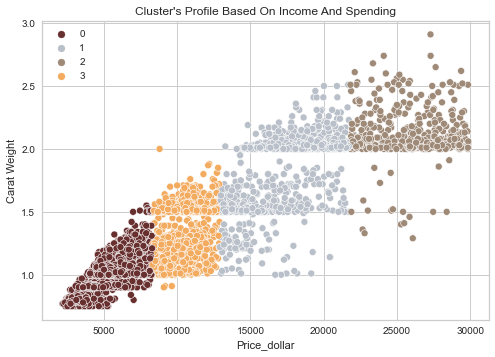

In [33]:
pl = sns.scatterplot(data = ds,y=df["Carat Weight"], x=df["Price_dollar"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [34]:
average_prices_per_cluster = ds.groupby('Clusters')['Price_dollar'].mean()
print(average_prices_per_cluster)

Clusters
0     5334.826101
1    17301.322799
2    25810.058952
3    10304.410714
Name: Price_dollar, dtype: float64


In [35]:
average_Carat_Weight_cluster = ds.groupby('Clusters')['Carat Weight'].mean()
print(average_Carat_Weight_cluster)

Clusters
0    0.993513
1    1.807077
2    2.106157
3    1.309554
Name: Carat Weight, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


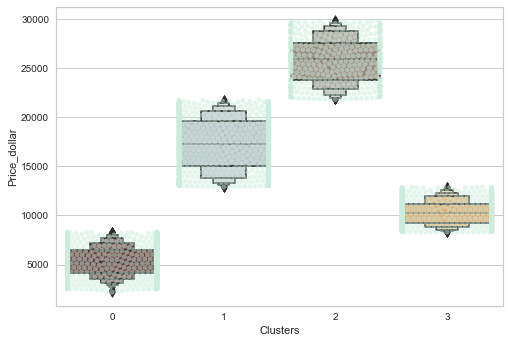

In [36]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Price_dollar"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Price_dollar"], palette=pal)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


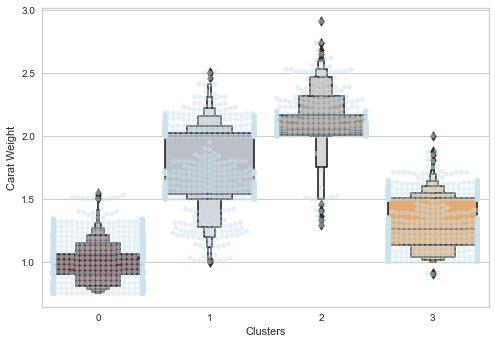

In [37]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Carat Weight"], color= "#cbe3ed", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Carat Weight"], palette=pal)
plt.show()

In [38]:
# Анализ распределения категориальных переменных Cut, Color, и Clarity по различным кластерам
cut_distribution = pd.crosstab(df['Clusters'], df['Cut'])
print("Cut Distribution across Clusters:")
print(cut_distribution)
print("\n")   
color_distribution = pd.crosstab(df['Clusters'], df['Color'])
print("Color Distribution across Clusters:")
print(color_distribution)
print("\n")
clarity_distribution = pd.crosstab(df['Clusters'], df['Clarity'])
print("Clarity Distribution across Clusters:")
print(clarity_distribution)
print("\n")


Cut Distribution across Clusters:
Cut         1    2     3     4    5
Clusters                           
0         112  466  1351  1126  102
1           4  111   362   363   46
2           3   37   192   219    7
3          10   79   385   558   88


Color Distribution across Clusters:
Color       1    2    3    4    5    6
Clusters                              
0         564  625  697  480  439  352
1         188  192  205  139   77   85
2          35   99  192   67   36   29
3         180  148  321  224  154   93


Clarity Distribution across Clusters:
Clarity      1    2    3    4    5   6
Clusters                              
0         1477  857  521  201   64  37
1          301  236  154  110   51  34
2           59  197  139   32   13  18
3          216  212  256  251  110  75




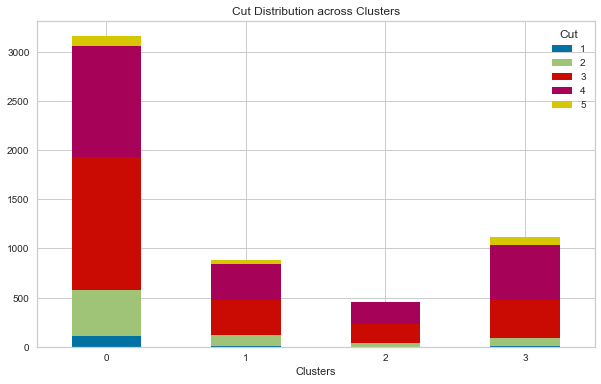

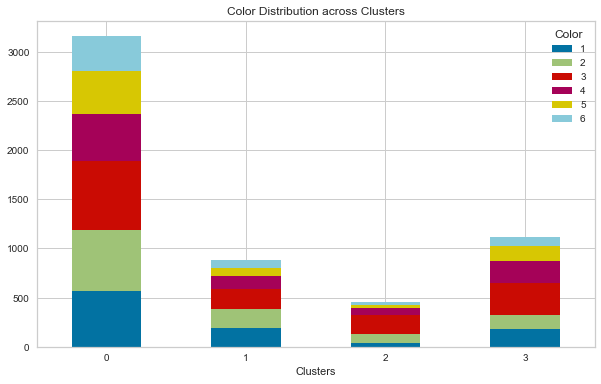

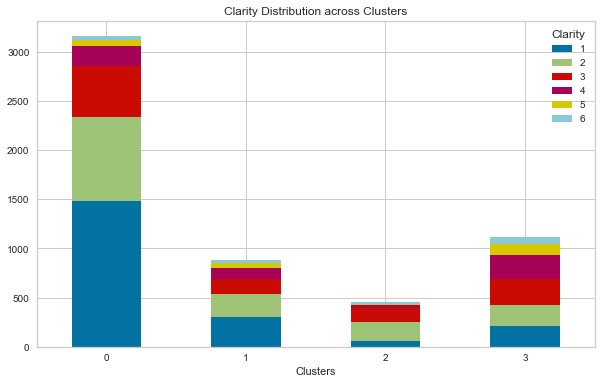

In [39]:
def plot_distribution(data, title):
    ax = data.plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(title)
    plt.xticks(rotation=0)
    plt.show()
plot_distribution(cut_distribution, "Cut Distribution across Clusters")
plot_distribution(color_distribution, "Color Distribution across Clusters")
plot_distribution(clarity_distribution, "Clarity Distribution across Clusters")

### Анализ Распределения Качества Огранки (Cut)
1. **Кластер 0:** Подавляющее большинство бриллиантов в этом кластере имеет огранку качества 3 и 4. Это указывает на то, что бриллианты в этом кластере, вероятно, представляют собой сбалансированное сочетание качества и стоимости.
2. **Кластер 1 и 2:** Подобно кластеру 0, бриллианты в этих кластерах также склонны к огранке среднего качества (3 и 4), что может указывать на аналогичный тип бриллиантов среднего уровня.
3. **Кластер 3:** Хотя и здесь преобладают бриллианты с огранкой 3 и 4, интересно, что здесь относительно больше бриллиантов с огранкой высокого качества (5) по сравнению с другими кластерами.

### Анализ Распределения Цвета (Color)
1. **Кластер 0:** Распределение цвета довольно равномерное с небольшим преобладанием бриллиантов цвета 3. Это может указывать на широкий ассортимент доступных цветов.
2. **Кластер 1:** Равномерное распределение с некоторым уменьшением доли бриллиантов более темных оттенков (5 и 6).
3. **Кластер 2:** Существенное снижение в количествах всех категорий цветов, что может указывать на специфическую нишу или меньший размер кластера.
4. **Кластер 3:** Преобладание бриллиантов с цветами в среднем диапазоне (3 и 4), что может отражать определенный предпочтительный сегмент рынка.

### Анализ Распределения Чистоты (Clarity)
1. **Кластер 0:** Основное количество бриллиантов имеет чистоту 1 и 2, что свидетельствует о высоком качестве камней.
2. **Кластер 1:** Аналогичный кластеру 0, но с меньшим количеством бриллиантов в каждой категории чистоты.
3. **Кластер 2:** Больше разнообразие, но преобладают бриллианты со средней чистотой (2 и 3).
4. **Кластер 3:** Сильное разнообразие с преобладанием чистоты от 2 до 4.

### Общие выводы
- **Кластер 0:** Самый большой кластер с высоким качеством огранки и чистоты. Это могут быть бриллианты высокого качества по доступным ценам.
- **Кластер 1 и 2:** Средние по размеру кластеры с умеренным качеством огранки и чистоты. Может представлять более доступные опции.
- **Кластер 3:** Отличается большей долей бриллиантов с высоким качеством огранки, что может указывать на более дорогую категорию.



### Общие выводы:
- **Кластер 0** подходит для целевой аудитории, ищущей доступные опции, возможно, для массового рынка или в качестве подарков.
- **Кластер 1** идеально подходит для премиум сегмента, где покупатели готовы платить за размер и возможное качество огранки.
- **Кластер 2** предназначен для эксклюзивного сегмента рынка, включая коллекционеров и инвесторов, ищущих уникальные или редкие бриллианты.
- **Кластер 3** может быть ориентирован на средний класс, предлагая хорошее соотношение цены и качества для более осознанных покупателей.я

## Расчет индекса "цена-качество" вариант1

In [30]:
X = df.drop(['ID', 'Price_dollar', 'Clusters'], axis=1)
y = df['Price_dollar']
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X, y)
feature_importances = model2.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df['Normalized Importance'] = features_df['Importance'] / features_df['Importance'].sum()
print(features_df)


        Feature  Importance  Normalized Importance
0  Carat Weight    0.875637               0.875637
3       Clarity    0.059885               0.059885
2         Color    0.057630               0.057630
1           Cut    0.006848               0.006848


In [31]:
# Сопоставление весов с соответствующими признаками в основном датафрейме
for feature in features_df['Feature']:
    df[feature + '_Weighted'] = df[feature] * features_df.loc[features_df['Feature'] == feature, 'Normalized Importance'].values[0]

In [32]:
# Расчет общего взвешенного качества
df['Quality_Score'] = df[[col + '_Weighted' for col in features_df['Feature']]].sum(axis=1)

In [33]:
df['Quality_Price_Index'] = df['Quality_Score'] / df['Price_dollar']

In [34]:
df

,ID,Carat Weight,Cut,Color,Clarity,Price_dollar,Clusters,Carat Weight_Weighted,Clarity_Weighted,Color_Weighted,Cut_Weighted,Quality_Score,Quality_Price_Index
0,1,1.10,4,2,1,5169.0,0,0.963201,0.059885,0.115261,0.027393,1.165739,0.000226
1,2,0.83,4,2,3,3470.0,0,0.726779,0.179654,0.115261,0.027393,1.049086,0.000302
2,3,0.85,4,2,1,3183.0,0,0.744291,0.059885,0.115261,0.027393,0.946830,0.000297
3,4,0.91,4,5,1,4370.0,0,0.796830,0.059885,0.288152,0.027393,1.172259,0.000268
4,5,0.83,4,3,1,3171.0,0,0.726779,0.059885,0.172891,0.027393,0.986947,0.000311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,5995,0.81,3,6,4,5423.0,0,0.709266,0.239538,0.345782,0.020545,1.315131,0.000243
5995,5996,1.03,4,6,1,6250.0,0,0.901906,0.059885,0.345782,0.027393,1.334966,0.000214
5996,5997,1.00,3,6,1,5328.0,0,0.875637,0.059885,0.345782,0.020545,1.301848,0.000244
5997,5998,1.02,4,6,1,6157.0,0,0.893150,0.059885,0.345782,0.027393,1.326209,0.000215


In [35]:
# Сортировка df по Quality_Price_Index и вывод первых 10 записей
top_10_quality_price_index = df.sort_values(by='Quality_Price_Index', ascending=False).head(10)
top_10_quality_price_index[['ID', 'Carat Weight', 'Cut', 'Color', 'Clarity', 'Price_dollar', 'Quality_Price_Index', 'Clusters']]


,ID,Carat Weight,Cut,Color,Clarity,Price_dollar,Quality_Price_Index,Clusters
1565,1566,0.77,2,1,3,2184.0,0.000424,0
152,153,0.79,2,5,1,2548.0,0.000413,0
2005,2006,0.78,3,5,1,2565.0,0.000410,0
2420,2421,0.79,3,1,4,2589.0,0.000390,0
788,789,0.76,3,5,1,2668.0,0.000388,0
2433,2434,0.75,1,4,2,2648.0,0.000383,0
5784,5785,0.77,2,2,4,2734.0,0.000381,0
3551,3552,0.76,1,2,4,2699.0,0.000381,0
855,856,0.82,3,1,3,2583.0,0.000378,0
3207,3208,0.78,3,6,1,2945.0,0.000377,0


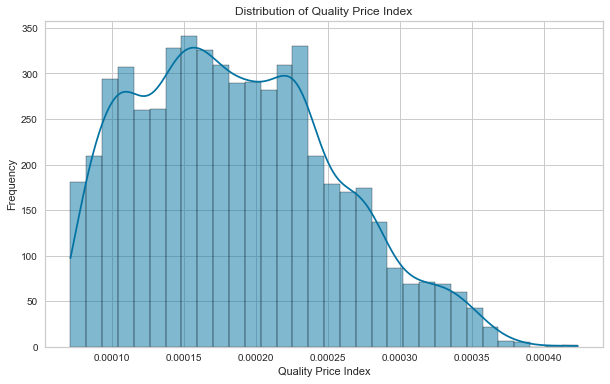

In [36]:
# Визуализация распределения Quality_Price_Index
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality_Price_Index'], kde=True)
plt.title('Distribution of Quality Price Index')
plt.xlabel('Quality Price Index')
plt.ylabel('Frequency')
plt.show()

## Расчет индекса "цена-качество" вариант2 (просто в предыдущем варианте цены были такие низкие в сравнении со средним, хотела что-то более лакшари посмотреть ;D)

In [41]:
# Создание критериев выбора
cut_criteria = df['Cut'] >= 3
clarity_criteria = df['Clarity'] >= 4
color_criteria = df['Color'] >= 4
Carat_Weight_criteria = df['Carat Weight'] >= 0.75

In [42]:
# Применение всех критериев для фильтрации DataFrame
filtered_df = df[cut_criteria & clarity_criteria & color_criteria & Carat_Weight_criteria]
# Расчёт соотношения цены к сумме баллов огранки, цвета и чистоты
filtered_df['Value_Ratio'] = (filtered_df['Cut'] + filtered_df['Color'] + filtered_df['Clarity'] + filtered_df['Carat Weight']) / filtered_df['Price_dollar']

<ipython-input-42-ffe8be88cc6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Value_Ratio'] = (filtered_df['Cut'] + filtered_df['Color'] + filtered_df['Clarity'] + filtered_df['Carat Weight']) / filtered_df['Price_dollar']


In [43]:
# Сортировка DataFrame по 'Value_Ratio' для идентификации наилучших предложений
best_value_df = filtered_df.sort_values(by='Value_Ratio', ascending=False)
best_value_df.head(10)

,ID,Carat Weight,Cut,Color,Clarity,Price_dollar,Clusters,Value_Ratio
5627,5628,0.75,4,4,4,3710.0,0,0.003437
713,714,0.76,3,6,4,4125.0,0,0.003336
134,135,0.75,3,4,4,3551.0,0,0.003309
655,656,0.76,3,5,4,3891.0,0,0.003279
3572,3573,0.75,3,5,4,4005.0,0,0.003184
4238,4239,0.76,3,5,6,4798.0,0,0.003076
5163,5164,0.77,4,4,5,4619.0,0,0.002981
3871,3872,0.77,3,4,5,4304.0,0,0.002967
5452,5453,0.75,3,6,4,4656.0,0,0.002953
2188,2189,0.80,4,5,4,4747.0,0,0.002907


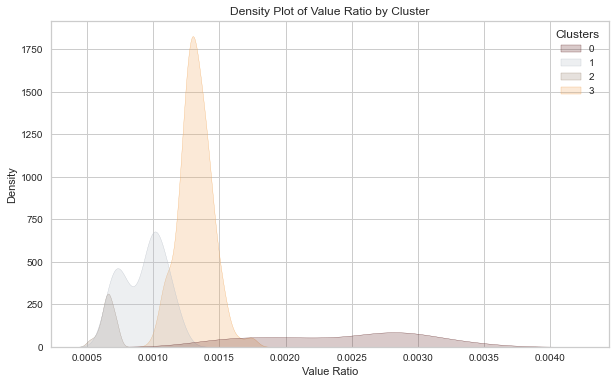

In [44]:
#посмотреть на распределение Value_Ratio по кластерам
plt.figure(figsize=(10, 6))
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sns.kdeplot(data=best_value_df, x='Value_Ratio', hue='Clusters', fill=True, palette= pal)
plt.title('Density Plot of Value Ratio by Cluster')
plt.xlabel('Value Ratio')
plt.ylabel('Density')
plt.show()


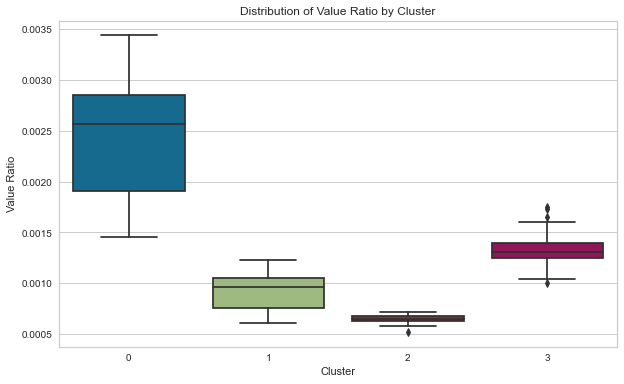

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Value_Ratio', data=best_value_df)
plt.title('Distribution of Value Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value Ratio')
plt.show()

In [ ]:
В рамках задачи выбора наилучших вариантов бриллиантов для Грега, учитывая соотношение цены и качества, анализ был выполнен с использованием данных о бриллиантах из кластера 0. Эти бриллианты ориентированы на массовую продажу и предоставляют широкий ассортимент вариантов для потребителей. Основываясь на предоставленных данных и с учётом необходимости обеспечения высокого качества при оптимальной цене, мы можем сформировать следующие выводы и рекомендации:

Анализ и Выбор Бриллиантов
Оценка качества: Используя оценочные шкалы для Cut, Color и Clarity, мы определили, что бриллианты с лучшим сочетанием этих параметров имеют наибольшую ценность. Особое внимание было уделено бриллиантам с высокими показателями в этих категориях, так как они обещают лучшее качество и визуальное восприятие.
Соотношение цена-качество: Для определения наилучших покупок было рассмотрено значение Value_Ratio, которое отражает соотношение между стоимостью и качественными характеристиками камня. Высокие значения этого индекса указывают на то, что покупатель получает больше за свои деньги.
Рекомендации по выбору:
Из первой десятки: Бриллиант с ID 855 предлагает неплохое сочетание размера, огранки и чистоты по сравнительно низкой цене, несмотря на более низкий рейтинг цвета.
Из второй десятки: Бриллиант с ID 5163 выделяется среди прочих своим идеальным рейтингом огранки и очень высоким уровнем чистоты и цвета, предлагая выдающееся соотношение цены и качества.
Имплементация ML для Анализа
Для дальнейшей работы и более глубокого анализа данных могут быть использованы методы машинного обучения:

Кластеризация: Продолжить разделение бриллиантов на более мелкие подгруппы для более точного анализа предпочтений и трендов покупателей.
Регрессионный анализ: Использование моделей регрессии для прогнозирования цен на бриллианты на основе их характеристик, что поможет определить наиболее недооцененные камни.
Консультационные Услуги
В качестве консультантов мы можем предложить следующие шаги для Грега:

Образовательная программа: Провести семинары или вебинары по основам выбора бриллиантов, чтобы помочь Грегу лучше понимать, какие характеристики бриллианта наиболее важны.
Персонализированные рекомендации: Разработать персонализированный алгоритм или инструмент, который будет помогать Грегу в выборе бриллиантов на основе его предпочтений и бюджета.
Эти шаги помогут Грегу сделать обоснованный выбор и уверенно инвестировать в бриллианты, которые предлагают наилучшее соотношение качества и цены.






